In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load the input image using OpenCV
img = cv2.imread("/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/data/EyeDentify/W_SR/GFPGAN_x2/left_eye/1/1/frame_01.png.png")

In [3]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
def show_images(images, titles, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        if isinstance(image, Image.Image):  # Check if the image is a PIL Image
            image = np.array(image)
        if len(image.shape) == 2:  # Check if the image is grayscale
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

In [6]:
# gray_blurred = cv2.medianBlur(gray, 3)
gray_blurred = cv2.GaussianBlur(gray, ksize=(3, 3), sigmaX=2, sigmaY=2,) 

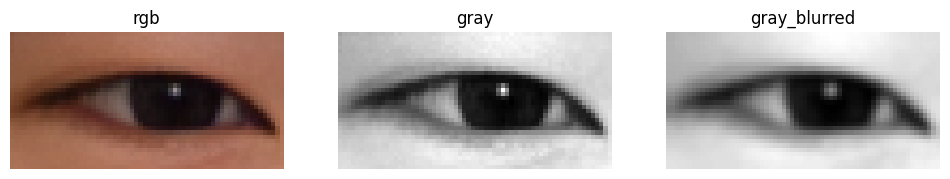

In [7]:
show_images([image_rgb, gray, gray_blurred], ['rgb', 'gray', 'gray_blurred'])

In [8]:
# https://www.geeksforgeeks.org/circle-detection-using-opencv-python/
detected_circles = cv2.HoughCircles(
    gray_blurred, cv2.HOUGH_GRADIENT_ALT, 1, 10, param1=10, param2=0, minRadius=0, maxRadius=0
)
print(detected_circles)

[[[38.       13.       10.680331]]]


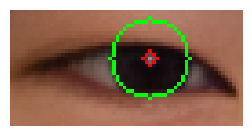

In [9]:
if detected_circles is not None: 
    detected_circles = np.uint16(np.around(detected_circles)) 
    plt.figure(figsize=(3, 3))
    for i in detected_circles[0,:]:
        # draw the outer circle
        cv2.circle(image_rgb,(i[0],i[1]),i[2],(0,255,0),1)
        # draw the center of the circle
        cv2.circle(image_rgb,(i[0],i[1]),2,(255,0,0),1)
    plt.axis('off')
    plt.imshow(image_rgb)
    plt.show()

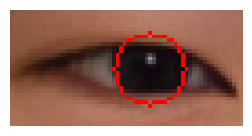

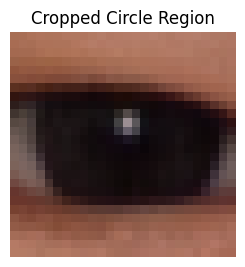

In [71]:
def detect_circle(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
    
    # Apply a blur to reduce noise
    # gray_blurred = cv2.medianBlur(gray, 1)
    gray_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=2, sigmaY=2,) 
    
    # Detect circles using HoughCircles
    circles = cv2.HoughCircles(
        gray_blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=20,
        param2=5,
        minRadius=2,
        maxRadius=15
    )
    
    return circles

def overlay_circle(image, circle, border_thickness=2, border_color=(255, 0, 0, 255)):
    output = image.copy()
    if circle is not None:
        circles = np.round(circle[0, :]).astype("int")
        for (x, y, r) in circles:
            # Draw the circle border
            cv2.circle(output, (x, y), r, border_color, border_thickness)
            # Draw the inner circle
            # cv2.circle(output, (x, y), r, border_color, -1)
    return output

def crop_circle(image, circle, buffer=5):
    if circle is not None:
        circles = np.round(circle[0, :]).astype("int")
        for (x, y, r) in circles:
            x_min = max(x - r - buffer, 0)
            x_max = min(x + r + buffer, image.shape[1])
            y_min = max(y - r - buffer, 0)
            y_max = min(y + r + buffer, image.shape[0])
            cropped_image = image[y_min:y_max, x_min:x_max]
            return cropped_image
    return None

# Load image
image_path = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/data/EyeDentify/W_SR/GFPGAN_x2/left_eye/1/1/frame_01.png.png"
image = Image.open(image_path).convert('RGBA')
pixels = np.array(image)

# Detect circle
circles = detect_circle(pixels)

# Overlay circle with border
border_thickness = 1  # Thickness of the border
border_color = (255, 0, 0, 255)  # Red color with full opacity
processed_pixels = overlay_circle(pixels, circles, border_thickness, border_color)

# Convert back to Image and save
processed_image = Image.fromarray(processed_pixels)
buffer = 3  # pixels buffer
cropped_image = crop_circle(pixels, circles, buffer)

# processed_image.save('path_to_processed_image_with_circle.png')
# Display the image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(processed_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Display the cropped circle region
if cropped_image is not None:
    cropped_image_pil = Image.fromarray(cropped_image)
    plt.subplot(1, 2, 2)
    plt.imshow(cropped_image_pil)
    plt.title("Cropped Circle Region")
    plt.axis('off')

plt.show()